Так как сейчас в индустрии для таких задач как, детекция и сегментация наиболее актуальны билилиотеки от open-mmlab, решил использовать для этой задачи бибилиотеку mmdetection, с целью ее изучения и применения так же на текущем месте работы. 
Для запуска ноутбуков нужно установить бибилиотеку согласно инструкции https://mmsegmentation.readthedocs.io/en/latest/

In [17]:
# подключим свой аккаунт ClearML
%env CLEARML_WEB_HOST=https://app.clear.ml
%env CLEARML_API_HOST=https://api.clear.ml
%env CLEARML_FILES_HOST=https://files.clear.ml
%env CLEARML_API_ACCESS_KEY=%%%%%%%%%%%%%%%%%%%%%%
%env CLEARML_API_SECRET_KEY=%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

env: CLEARML_WEB_HOST=https://app.clear.ml
env: CLEARML_API_HOST=https://api.clear.ml
env: CLEARML_FILES_HOST=https://files.clear.ml
env: CLEARML_API_ACCESS_KEY=%%%%%%%%%%%%%%%%%%%%%%
env: CLEARML_API_SECRET_KEY=%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%


In [18]:
import mmcv
import mmengine
import matplotlib.pyplot as plt
import os
import numpy as np
from PIL import Image
import random
from mmseg.registry import DATASETS
from mmseg.datasets import BaseSegDataset
from mmengine import Config
from mmengine.runner import Runner
from mmseg.apis import init_model, inference_model, show_result_pyplot
import matplotlib.patches as mpatches

In [3]:
# Зафиксируем random seed
random.seed(142)

In [11]:
# Функция для отображения нескольких экземпляров датасета
def display_few_examples_from_data(dataset, n=4):
    figure, ax = plt.subplots(nrows=n, ncols=2, figsize=(10, 24))
    for i in range(n):
        im_info = dataset.__getitem__(i)['data_samples']
        image = plt.imread(im_info.img_path)
        mask = plt.imread(im_info.seg_map_path)
        ax[i, 0].imshow(image)
        ax[i, 1].imshow(mask, interpolation="nearest")

        ax[i, 0].set_title("Image")
        ax[i, 1].set_title("Mask")

        ax[i, 0].set_axis_off()
        ax[i, 1].set_axis_off()
    plt.tight_layout()
    plt.show()

In [4]:
# определим путь к датасету и папкам аннотаций и изображений
data_root = './data/Final_dataset'
img_dir = 'images'
ann_dir = 'annotations/labels'
# определим классы и их цвета
classes = ('__background', 'body', 'solar panel', 'antenna')
palette = [[0, 0, 0], [0, 255, 0], [255, 0, 0], [0, 0, 255]]
# определим папку для списков треин и вал
split_dir = 'splits'
mmengine.mkdir_or_exist(os.path.join(data_root, split_dir))

In [67]:
# Конвертируем датасет в формат mmsegmentation
# сделаем train.txt
filename_list = [os.path.splitext(filename)[0] for filename in mmengine.scandir(
    os.path.join(data_root, 'images/train'), suffix='.png')]
with open(os.path.join(data_root, split_dir, 'train.txt'), 'w') as f:
    f.writelines(line + '\n' for line in filename_list)

In [68]:
# сделаем val.txt
filename_list = [os.path.splitext(filename)[0] for filename in mmengine.scandir(
    os.path.join(data_root, 'images/val'), suffix='.png')]
with open(os.path.join(data_root, split_dir, 'val.txt'), 'w') as f:
    f.writelines(line + '\n' for line in filename_list)

In [14]:
# конвертируем аннотации и скопируем их в общую папку
for file in os.listdir(f'{data_root}/mask/train'):
    print(file)
    seg_map = np.array(Image.open(f'{data_root}/mask/train/{file}'))
    seg_map = np.dot(seg_map, [2 / 255, 1 / 255, 3 / 255]).astype(np.uint8)
    seg_img = Image.fromarray(seg_map).convert('P')
    seg_img.putpalette(np.array(palette, dtype=np.uint8))
    seg_img.save(f"{data_root}/{ann_dir}/{file.replace('_mask', '')}")

img_resize_3080_mask.png
img_resize_1813_mask.png
img_resize_343_mask.png
img_resize_2825_mask.png
img_resize_1792_mask.png
img_resize_210_mask.png
img_resize_2225_mask.png
img_resize_1077_mask.png
img_resize_2814_mask.png
img_resize_1159_mask.png
img_resize_169_mask.png
img_resize_2311_mask.png
img_resize_2828_mask.png
img_resize_2998_mask.png
img_resize_1101_mask.png
img_resize_1339_mask.png
img_resize_2806_mask.png
img_resize_2488_mask.png
img_resize_1558_mask.png
img_resize_1669_mask.png
img_resize_1139_mask.png
img_resize_1276_mask.png
img_resize_2235_mask.png
img_resize_1796_mask.png
img_resize_369_mask.png
img_resize_1295_mask.png
img_resize_2789_mask.png
img_resize_1546_mask.png
img_resize_2948_mask.png
img_resize_2046_mask.png
img_resize_3096_mask.png
img_resize_150_mask.png
img_resize_2510_mask.png
img_resize_2213_mask.png
img_resize_1088_mask.png
img_resize_2112_mask.png
img_resize_51_mask.png
img_resize_2910_mask.png
img_resize_3027_mask.png
img_resize_43_mask.png
img_resiz

ClearML Monitor: Could not detect iteration reporting, falling back to iterations as seconds-from-start


In [15]:
# конвертируем аннотации и скопируем их в общую папку
for file in os.listdir(f'{data_root}/mask/val'):
    print(file)
    seg_map = np.array(Image.open(f'{data_root}/mask/val/{file}'))
    seg_map = np.dot(seg_map, [2 / 255, 1 / 255, 3 / 255]).astype(np.uint8)
    seg_img = Image.fromarray(seg_map).convert('P')
    seg_img.putpalette(np.array(palette, dtype=np.uint8))
    seg_img.save(f"{data_root}/{ann_dir}/{file.replace('_mask', '')}")

img_resize_559_mask.png
img_resize_570_mask.png
img_resize_798_mask.png
img_resize_785_mask.png
img_resize_585_mask.png
img_resize_858_mask.png
img_resize_757_mask.png
img_resize_889_mask.png
img_resize_829_mask.png
img_resize_524_mask.png
img_resize_654_mask.png
img_resize_696_mask.png
img_resize_422_mask.png
img_resize_983_mask.png
img_resize_892_mask.png
img_resize_444_mask.png
img_resize_469_mask.png
img_resize_707_mask.png
img_resize_715_mask.png
img_resize_528_mask.png
img_resize_939_mask.png
img_resize_412_mask.png
img_resize_697_mask.png
img_resize_461_mask.png
img_resize_424_mask.png
img_resize_809_mask.png
img_resize_795_mask.png
img_resize_764_mask.png
img_resize_452_mask.png
img_resize_712_mask.png
img_resize_593_mask.png
img_resize_907_mask.png
img_resize_759_mask.png
img_resize_635_mask.png
img_resize_866_mask.png
img_resize_982_mask.png
img_resize_626_mask.png
img_resize_552_mask.png
img_resize_611_mask.png
img_resize_814_mask.png
img_resize_789_mask.png
img_resize_537_m

In [5]:
# Посомтрим пример получившейся разметки
img = Image.open('./data/Final_dataset/annotations/labels/img_resize_0_mask.png')

/tmp/ipykernel_391037/3789107383.py:7: MatplotlibDeprecationWarning: An artist whose label starts with an underscore was passed to legend(); such artists will no longer be ignored in the future.  To suppress this warning, explicitly filter out such artists, e.g. with `[art for art in artists if not art.get_label().startswith('_')]`.
  plt.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,


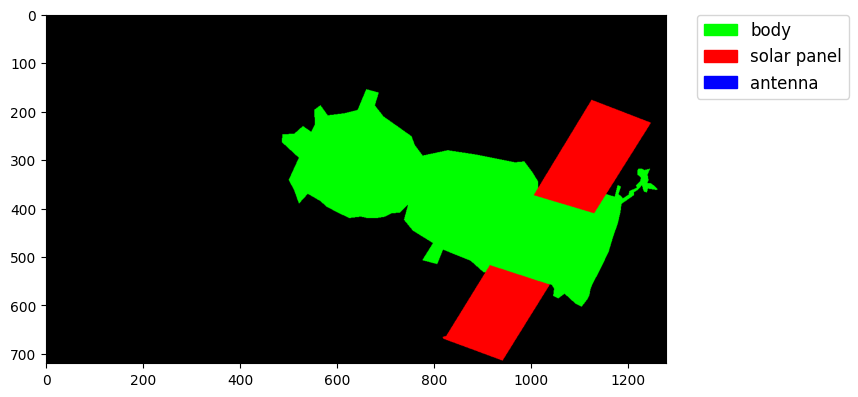

In [6]:
plt.figure(figsize=(8, 6))
im = plt.imshow(np.array(img.convert('RGB')))
patches = [mpatches.Patch(color=np.array(palette[i])/255., 
                          label=classes[i]) for i in range(4)]
plt.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., 
           fontsize='large')
plt.show()

In [6]:
# создадим класс нашего датасета
@DATASETS.register_module()
class SatelliteDataset(BaseSegDataset):
  METAINFO = dict(classes = classes, palette = palette)
  def __init__(self, **kwargs):
    super().__init__(img_suffix='.png', seg_map_suffix='.png', **kwargs)

In [19]:
# загрузим конфиг файл предобученной модели, предоставляемой бибилиотекой mmsegmentations
cfg = Config.fromfile('./checkpoints/fcn_r18-d8_4xb2-80k_cityscapes-512x1024.py')

In [20]:
# изменим конфиг под нашу задачу
cfg.norm_cfg = dict(type='BN', requires_grad=True)
cfg.crop_size = (512, 512)
cfg.model.data_preprocessor.size = cfg.crop_size
cfg.model.backbone.norm_cfg = cfg.norm_cfg
cfg.model.decode_head.norm_cfg = cfg.norm_cfg
cfg.model.auxiliary_head.norm_cfg = cfg.norm_cfg

cfg.model.decode_head.num_classes = 4
cfg.model.auxiliary_head.num_classes = 4

cfg.dataset_type = 'SatelliteDataset'
cfg.data_root = data_root

cfg.train_dataloader.batch_size = 8

# пропишем аугментации
cfg.train_pipeline = [
    dict(type='LoadImageFromFile'),
    dict(type='LoadAnnotations'),
    dict(type='RandomResize', scale=(640, 480), ratio_range=(0.5, 2.0), keep_ratio=True),
    dict(type='RandomCrop', crop_size=cfg.crop_size, cat_max_ratio=0.75),
    dict(type='RandomFlip', prob=0.5),
    dict(type='PackSegInputs')
]

cfg.test_pipeline = [
    dict(type='LoadImageFromFile'),
    dict(type='Resize', scale=(640, 480), keep_ratio=True),
    # add loading annotation after ``Resize`` because ground truth
    # does not need to do resize data transform
    dict(type='LoadAnnotations'),
    dict(type='PackSegInputs')
]

cfg.train_dataloader.dataset.type = cfg.dataset_type
cfg.train_dataloader.dataset.data_root = cfg.data_root
cfg.train_dataloader.dataset.data_prefix = dict(img_path=img_dir, seg_map_path=ann_dir)
cfg.train_dataloader.dataset.pipeline = cfg.train_pipeline
cfg.train_dataloader.dataset.ann_file = 'splits/train.txt'

cfg.val_dataloader.dataset.type = cfg.dataset_type
cfg.val_dataloader.dataset.data_root = cfg.data_root
cfg.val_dataloader.dataset.data_prefix = dict(img_path=img_dir, seg_map_path=ann_dir)
cfg.val_dataloader.dataset.pipeline = cfg.test_pipeline
cfg.val_dataloader.dataset.ann_file = 'splits/val.txt'

cfg.test_dataloader = cfg.val_dataloader

# добавим веса предобученной модели
cfg.load_from = './checkpoints/fcn_r18-d8_512x1024_80k_cityscapes_20201225_021327-6c50f8b4.pth'

cfg.work_dir = './work_dirs/satellite'

cfg.train_cfg.val_interval = 800
cfg.default_hooks.logger.interval = 50
cfg.default_hooks.checkpoint.interval = 800

cfg.visualizer = dict(
    name='visualizer',
    type='SegLocalVisualizer',
    vis_backends=[
        dict(type='ClearMLVisBackend')
    ])

cfg['randomness'] = dict(seed=142)

In [21]:
# сохраним конфиг в файл
config=f'./fcn_r18-d8_4xb2-80k_cityscapes-512x1024_satellite.py'
with open(config, 'w') as f:
    f.write(cfg.pretty_text)

In [9]:
# создадим раннер для обучения
runner = Runner.from_cfg(cfg)

02/27 09:03:52 - mmengine - INFO - 
------------------------------------------------------------
System environment:
    sys.platform: linux
    Python: 3.9.18 (main, Sep 11 2023, 13:41:44) [GCC 11.2.0]
    CUDA available: True
    numpy_random_seed: 142
    GPU 0: NVIDIA GeForce RTX 2060 SUPER
    CUDA_HOME: /usr
    NVCC: Cuda compilation tools, release 11.5, V11.5.119
    GCC: gcc (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0
    PyTorch: 2.0.1
    PyTorch compiling details: PyTorch built with:
  - GCC 9.3
  - C++ Version: 201703
  - Intel(R) oneAPI Math Kernel Library Version 2023.1-Product Build 20230303 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v2.7.3 (Git Hash 6dbeffbae1f23cbbeae17adb7b5b13f1f37c080e)
  - OpenMP 201511 (a.k.a. OpenMP 4.5)
  - LAPACK is enabled (usually provided by MKL)
  - NNPACK is enabled
  - CPU capability usage: AVX2
  - CUDA Runtime 11.8
  - NVCC architecture flags: -gencode;arch=compute_37,code=sm_37;-gencode;arch=compute_50,code=sm_50;-gencod

/home/eugene/ML_Courses/CV/mmsegmentation/mmseg/models/backbones/resnet.py:431: UserWarning:


/home/eugene/ML_Courses/CV/mmsegmentation/mmseg/models/builder.py:36: UserWarning:

``build_loss`` would be deprecated soon, please use ``mmseg.registry.MODELS.build()`` 

/home/eugene/ML_Courses/CV/mmsegmentation/mmseg/models/losses/cross_entropy_loss.py:250: UserWarning:

Default ``avg_non_ignore`` is False, if you would like to ignore the certain label and average loss over non-ignore labels, which is the same with PyTorch official cross_entropy, set ``avg_non_ignore=True``.



02/27 09:04:09 - mmengine - INFO - Distributed training is not used, all SyncBatchNorm (SyncBN) layers in the model will be automatically reverted to BatchNormXd layers if they are used.
02/27 09:04:09 - mmengine - INFO - Hooks will be executed in the following order:
before_run:
(VERY_HIGH   ) RuntimeInfoHook                    
(BELOW_NORMAL) LoggerHook                         
 -------------------- 
before_train:
(VERY_HIGH   ) RuntimeInfoHook                    
(NORMAL      ) IterTimerHook                      
(VERY_LOW    ) CheckpointHook                     
 -------------------- 
before_train_epoch:
(VERY_HIGH   ) RuntimeInfoHook                    
(NORMAL      ) IterTimerHook                      
(NORMAL      ) DistSamplerSeedHook                
 -------------------- 
before_train_iter:
(VERY_HIGH   ) RuntimeInfoHook                    
(NORMAL      ) IterTimerHook                      
 -------------------- 
after_train_iter:
(VERY_HIGH   ) RuntimeInfoHook                

/home/eugene/ML_Courses/CV/mmsegmentation/mmseg/engine/hooks/visualization_hook.py:60: UserWarning:

The draw is False, it means that the hook for visualization will not take effect. The results will NOT be visualized or stored.



Validation dataset
02/26 21:47:09 - mmengine - WARNING - The prefix is not set in metric class IoUMetric.


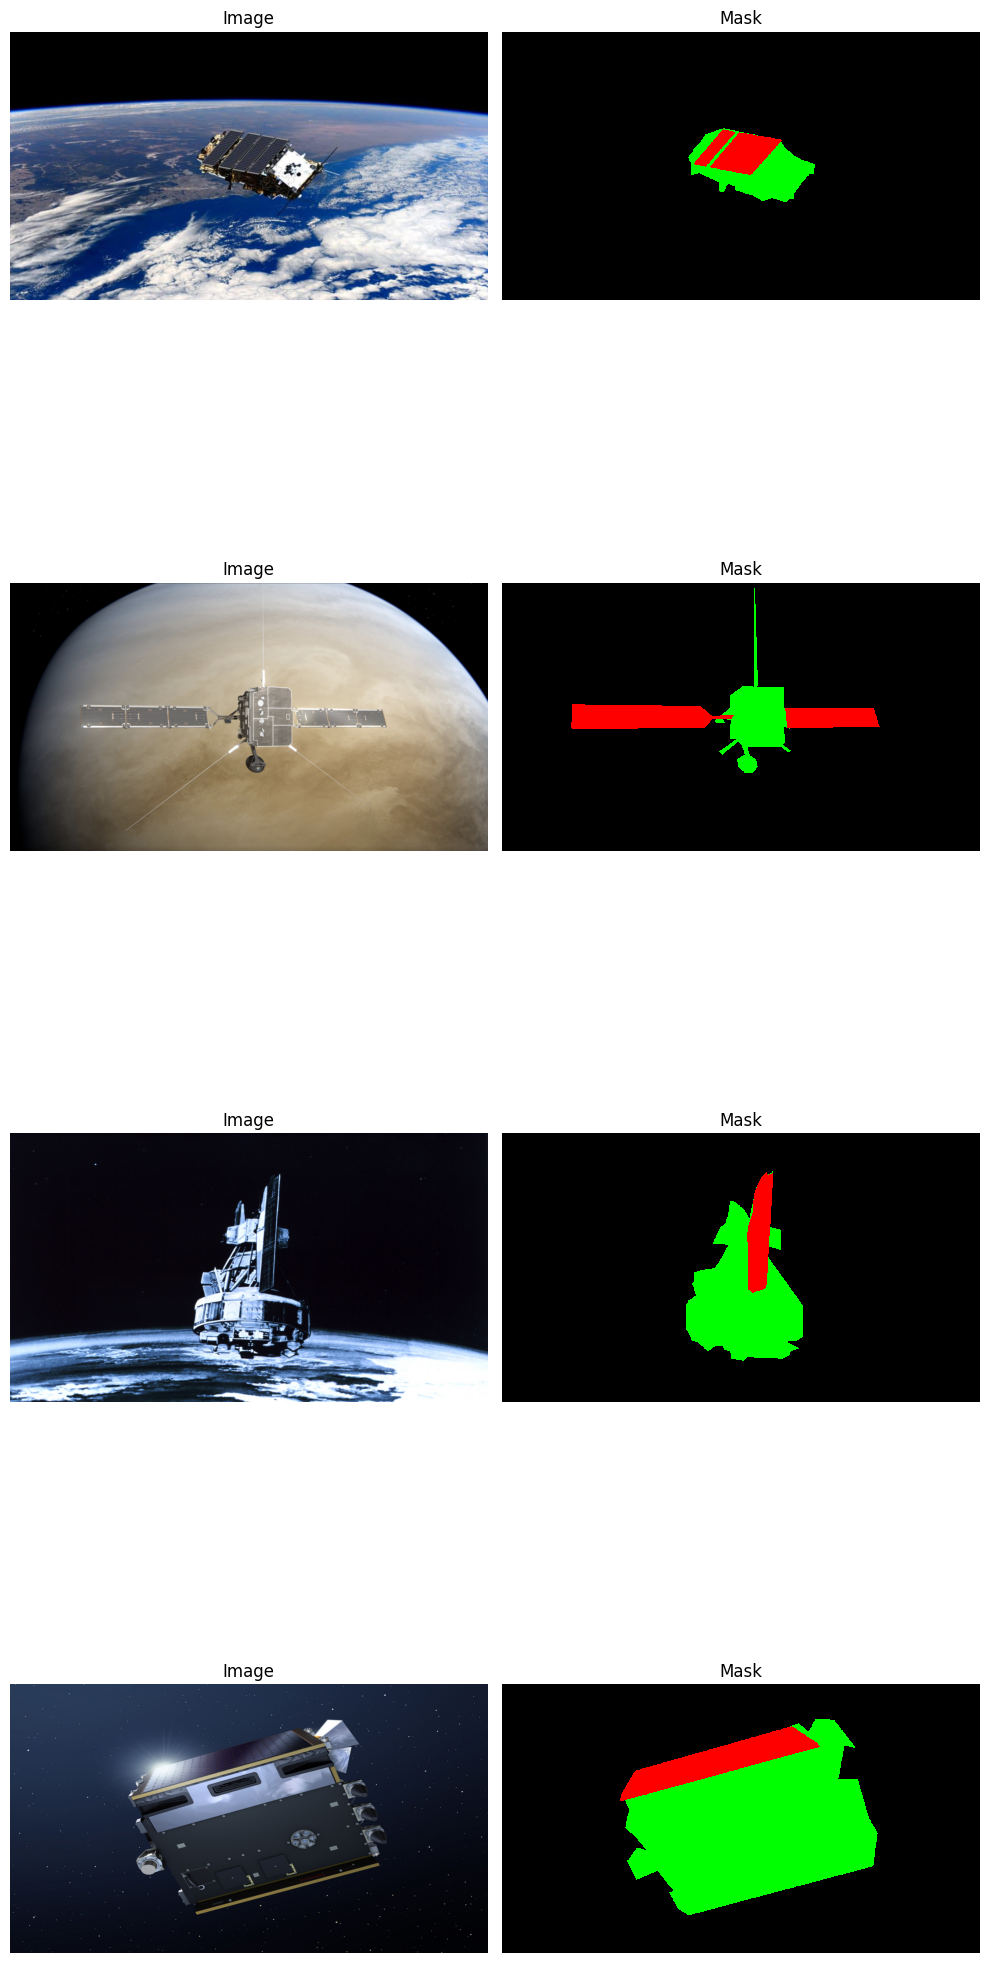

In [24]:
# посомтрим на несколько экземпляров из получившихся датасетов
display_few_examples_from_data(runner.train_dataloader.dataset)
print("Validation dataset")
display_few_examples_from_data(runner.val_dataloader.dataset)

In [1]:
# обучим модель
runner.train()

In [12]:
# инициируем модель, загрузим полученные веса
checkpoint_path = './work_dirs/satellite/best_iter_67200.pth'
model = init_model(cfg, checkpoint_path, 'cuda:0')

/home/eugene/ML_Courses/CV/mmsegmentation/mmseg/models/builder.py:36: UserWarning:

``build_loss`` would be deprecated soon, please use ``mmseg.registry.MODELS.build()`` 

/home/eugene/ML_Courses/CV/mmsegmentation/mmseg/models/losses/cross_entropy_loss.py:250: UserWarning:

Default ``avg_non_ignore`` is False, if you would like to ignore the certain label and average loss over non-ignore labels, which is the same with PyTorch official cross_entropy, set ``avg_non_ignore=True``.



Loads checkpoint by local backend from path: ./work_dirs/satellite/best_iter_67200.pth


In [13]:
# загрузим лучшые веса
runner.load_checkpoint(checkpoint_path)

Loads checkpoint by local backend from path: ./work_dirs/satellite/best_iter_67200.pth
02/27 21:18:38 - mmengine - INFO - Load checkpoint from ./work_dirs/satellite/best_iter_67200.pth


{'meta': {'epoch': 0,
  'iter': 67200,
  'cfg': "crop_size = (\n    512,\n    512,\n)\ndata_preprocessor = dict(\n    bgr_to_rgb=True,\n    mean=[\n        123.675,\n        116.28,\n        103.53,\n    ],\n    pad_val=0,\n    seg_pad_val=255,\n    size=(\n        512,\n        1024,\n    ),\n    std=[\n        58.395,\n        57.12,\n        57.375,\n    ],\n    type='SegDataPreProcessor')\ndata_root = './data/Final_dataset'\ndataset_type = 'SatelliteDataset'\ndefault_hooks = dict(\n    checkpoint=dict(by_epoch=False, interval=800, type='CheckpointHook'),\n    logger=dict(interval=50, log_metric_by_epoch=False, type='LoggerHook'),\n    param_scheduler=dict(type='ParamSchedulerHook'),\n    sampler_seed=dict(type='DistSamplerSeedHook'),\n    timer=dict(type='IterTimerHook'),\n    visualization=dict(type='SegVisualizationHook'))\ndefault_scope = 'mmseg'\nenv_cfg = dict(\n    cudnn_benchmark=True,\n    dist_cfg=dict(backend='nccl'),\n    mp_cfg=dict(mp_start_method='fork', opencv_num_th

In [14]:
runner.val()

02/27 21:18:46 - mmengine - INFO - Iter(val) [ 50/600]    eta: 0:00:16  time: 0.0225  data_time: 0.0020  memory: 303  
02/27 21:18:47 - mmengine - INFO - Iter(val) [100/600]    eta: 0:00:13  time: 0.0213  data_time: 0.0019  memory: 303  
02/27 21:18:48 - mmengine - INFO - Iter(val) [150/600]    eta: 0:00:11  time: 0.0224  data_time: 0.0021  memory: 303  
02/27 21:18:49 - mmengine - INFO - Iter(val) [200/600]    eta: 0:00:09  time: 0.0218  data_time: 0.0020  memory: 303  
02/27 21:18:50 - mmengine - INFO - Iter(val) [250/600]    eta: 0:00:08  time: 0.0258  data_time: 0.0022  memory: 303  
02/27 21:18:51 - mmengine - INFO - Iter(val) [300/600]    eta: 0:00:07  time: 0.0218  data_time: 0.0021  memory: 303  
02/27 21:18:52 - mmengine - INFO - Iter(val) [350/600]    eta: 0:00:05  time: 0.0216  data_time: 0.0020  memory: 303  
02/27 21:18:53 - mmengine - INFO - Iter(val) [400/600]    eta: 0:00:04  time: 0.0218  data_time: 0.0020  memory: 303  
02/27 21:18:55 - mmengine - INFO - Iter(val) [45

Action failed <400/110: tasks.add_or_update_artifacts/v2.10 (Invalid task status: expected=created, status=completed)> (task=f380576d9d8f4e7eb55561662f278706, artifacts=[{'key': 'iter_44800.pth', 'type': 'custom', 'uri': 'https://files.clear.ml/mmsegmentation/project3_seg.f380576d9d8f4e7eb55561662f278706/artifacts/iter_44800.pth/iter_44800.pth', 'content_size': 110343965, 'hash': '70d8da41534f2e4d1dfa712cefb11c5dea0e4a8745e9026345cfcaa2f9b4ed5d', 'timestamp': 1709035125, 'type_data': {'preview': 'iter_44800.pth - 110.34 MB\n'}}, {'key': 'iter_76800.pth', 'type': 'custom', 'uri': 'https://files.clear.ml/mmsegmentation/project3_seg.f380576d9d8f4e7eb55561662f278706/artifacts/iter_76800.pth/iter_76800.pth', 'content_size': 115827549, 'hash': 'c39abbd1a72ef5b40320a6d4ff68b2445a490d13dc739bbe4aa9078f7dd1ac19', 'timestamp': 1709035127, 'type_data': {'preview': 'iter_76800.pth - 115.83 MB\n'}}, {'key': 'iter_75200.pth', 'type': 'custom', 'uri': 'https://files.clear.ml/mmsegmentation/project3_s

{'aAcc': 97.46, 'mIoU': 81.95, 'mAcc': 87.71}

/home/eugene/anaconda3/envs/openmmlab/lib/python3.9/site-packages/mmengine/visualization/visualizer.py:196: UserWarning:

Failed to add <class 'mmengine.visualization.vis_backend.LocalVisBackend'>, please provide the `save_dir` argument.



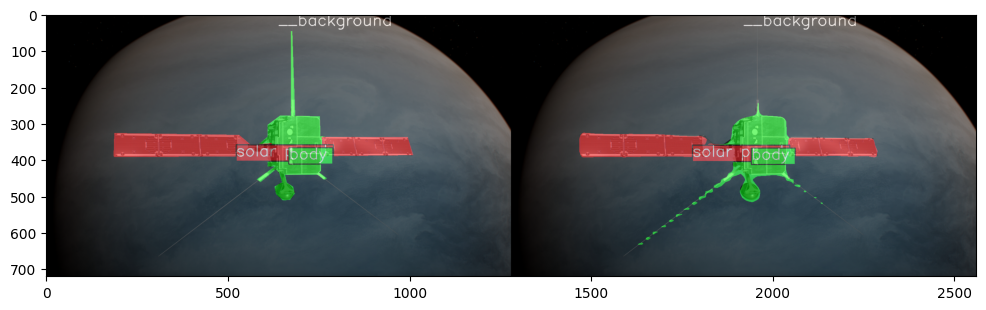

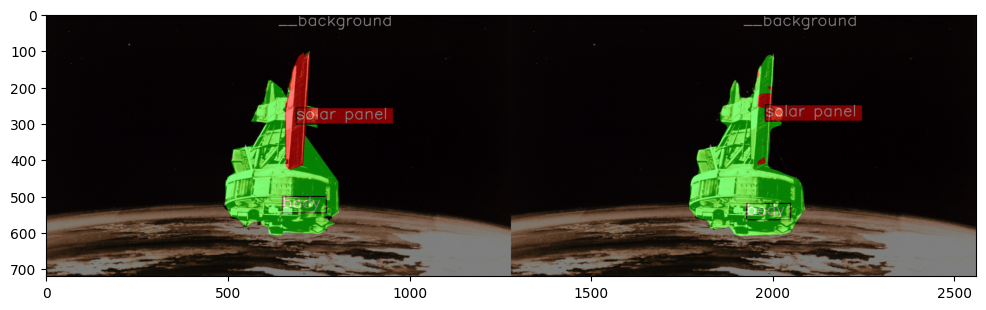

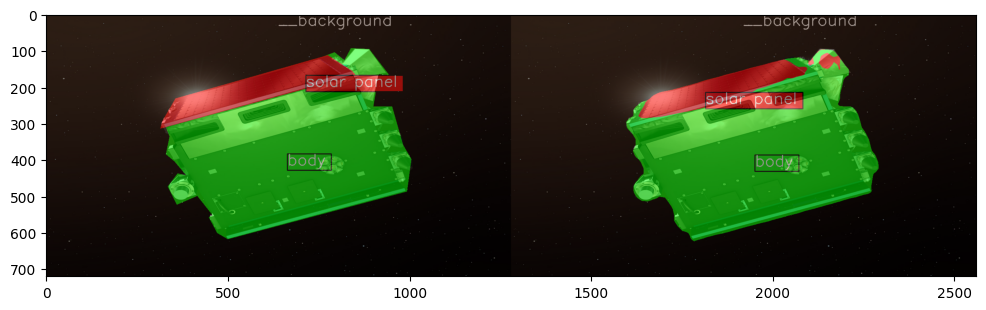

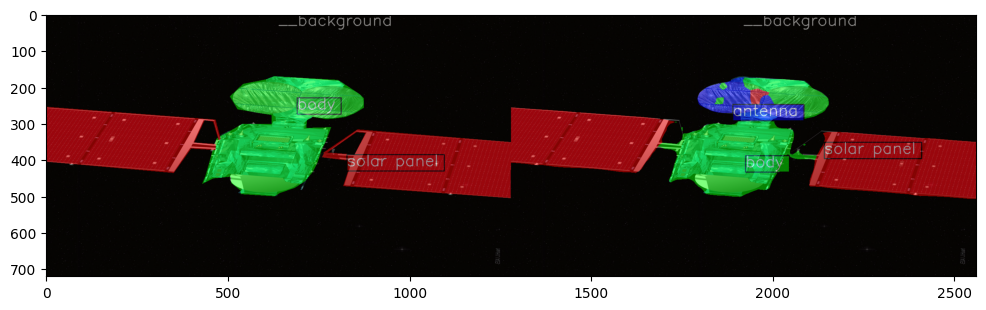

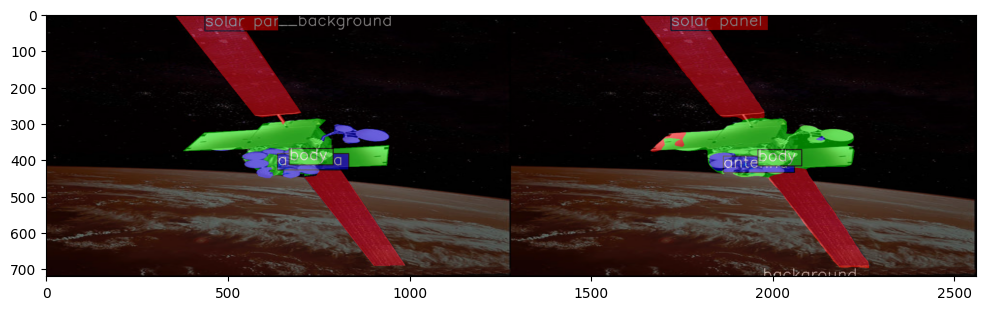

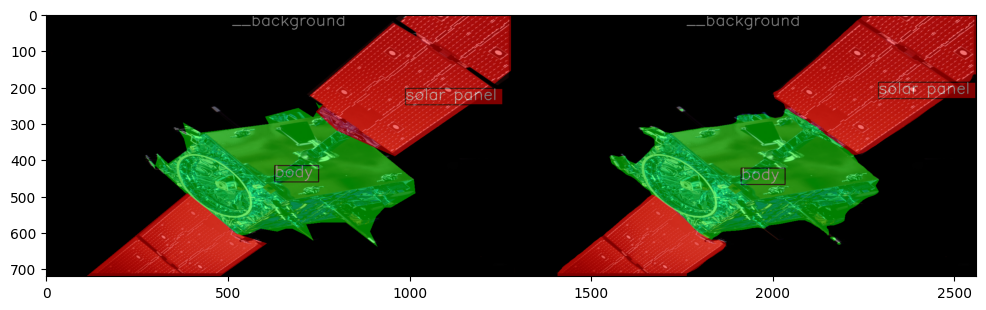

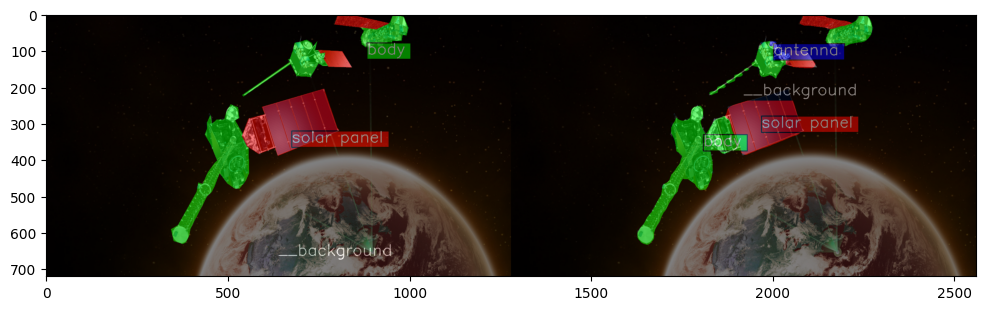

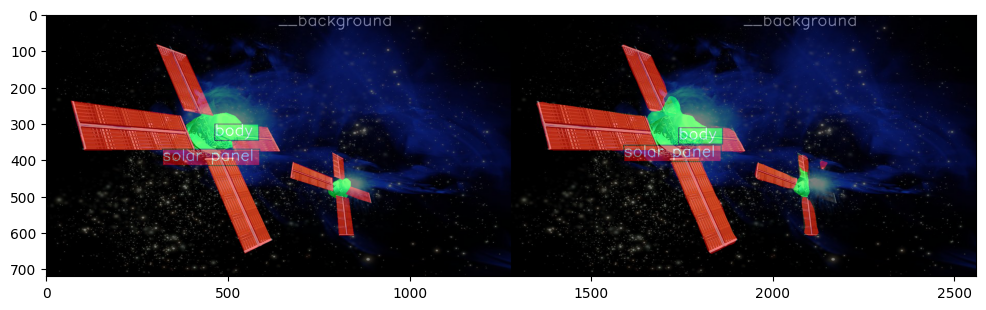

In [15]:
# посомтрим несколько результатов обученной модели и сравним их с размеченными данными
for i in range(10):
    data_sample = runner.val_dataloader.dataset.__getitem__(i)['data_samples']
    im_path = data_sample.img_path
    img = mmcv.imread(im_path)
    result = inference_model(model, img)
    result.gt_sem_seg = data_sample.gt_sem_seg.to('cuda')
    plt.figure(figsize=(12, 10))
    vis_result = show_result_pyplot(model, img, result, out_file='res.png')
    plt.imshow(plt.imread('res.png'))

#### Некоторые метрики при тренировке fasterRCNN

![подпись](./2024-02-27_21-55-43.png)

![подпись](./2024-02-27_21-56-17.png)

![подпись](./2024-02-27_21-57-03.png)

Для увеличения качества модели можно было бы продолжить тренировку, поиграться с аугментациями и оптимизатором. Но так как цель достигнута, исследования заканчиваю. Так же стоит обратить внимание, что метрика по классу антенна хуже, это связвно, что мало изображений с антеннами. Для исправления этой ситации можно было бы либо изменить выборку, добавив больше изображений с антеннами, либо попробовать функцию потерь для несбалансированных выборок, например weighted cross-entropy loss.